<h1> text mining </h1>

### Aim : how to represent words, documents and corpus in a structured data ?

<b> Summary </b> <br>
1. [Setup](#setup)
2. [Open files](#open)
3. [Data processing](#processing)
   1. [Lowerization](#lowerization)
   2. [Tokenization](#tokenization)
   3. [Spellchecking](#spellchecking)
   4. [Remove stop_words](#stopwords)
   5. [Stemmer or lemmatizer](#stemlemm)
   6. [Recap](#recap)
4. [Let's count the number of occurences](#occurences)
   1. [Top words](#topwords)
   2. [Cloudwords](#cloudwords)
5. [First method : TF-IDF](#tfidf)
6. [Let's digress : how to represent a high-dimensional vector in a 2D space ?](#visual)
   1. [Principal component analysis (PCA)](#pca)
   2. [t-distributed Stochastic Neighbor Embedding (t-SNE)](#tsne)
7. [Second method : LSA](#lsa)


# 1-Setup <a name="setup"></a>

In [3]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

# set working directory
os.chdir("C:/Users/Guide Info/Desktop/Introduction-to-text-mining-master")

#access to the data
path_to_data = "./data/inauguration_speech/"

# path where we will store the results
path_to_results = "./results/"

All data are available on http://www.presidency.ucsb.edu/inaugurals.php <br>
There are 27 speechs : from Wilson (1917) to Biden (2021).

# 2-Open files <a name="open"></a>

In [6]:
# list of all files
list_files = os.listdir(path_to_data)

# open all files
list_speech_input = []
for file in list_files : 
    text = open(path_to_data + file, 'r', encoding = "utf-8")
    list_speech_input.append(text.read())
    
# politics color
# Blue = Democrat | Red = Republican
list_color = ["blue", "red", "red", "red", "blue", "blue", "blue", "blue",
             "blue", "red", "red", "blue", "blue", "red", "red", "blue",
             "red", "red", "red", "blue", "blue", "red", "red", "blue",
              "blue", "red" ,"blue"]

print(list_files)

['1917_Wilson.txt', '1921_Harding.txt', '1925_Coolidge.txt', '1929_Hoover.txt', '1933_Roosevelt.txt', '1937_Roosevelt.txt', '1941_Roosevelt.txt', '1945_Roosevelt.txt', '1949_Truman.txt', '1953_Eisenhower.txt', '1957_Eisenhower.txt', '1961_Kennedy.txt', '1965_Johnson.txt', '1969_Nixon.txt', '1973_Nixon.txt', '1977_Carter.txt', '1981_Reagan.txt', '1985_Reagan.txt', '1989_Bush.txt', '1993_Clinton.txt', '1997_Clinton.txt', '2001_Bush.txt', '2005_Bush.txt', '2009_Obama.txt', '2013_Obama.txt', '2017_Trump.txt', '2021_Biden.txt']


In [7]:
# display Biden's speech (the last one)
Biden = list_speech_input[-1]
print(Biden)

Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, and my distinguished guests, and my fellow Americans: This is America's day. This is democracy's day, a day of history and hope, of renewal and resolve. Through a crucible for the ages America has been tested anew, and America has risen to the challenge.

Today we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. The people—the will of the people has been heard, and the will of the people has been heeded. We've learned again that democracy is precious, democracy is fragile. And at this hour, my friends, democracy has prevailed.

So now, on this hallowed ground where just a few days ago violence sought to shake the Capitol's very foundation, we come together as one Nation under God, indivisible, to carry out the peaceful transfer of power as we have for more than two centuries. As we look ahead in our uniquely American way—restless, bold, 

# 3-Data processing <a name="processing"></a>

In this part, there are several steps : 

- Lowerization <br>
- Tokenisation <br>
- Word correction (optional)<br>
- StopWords <br>
- Stemisation or Lemmatisation <br>

## 3.A-Lowerization <a name="lowerization"></a>

In [8]:
# Initial text (step 0)
biden_begin = Biden[0:465] #first two paragraphs
print(biden_begin) 

Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, and my distinguished guests, and my fellow Americans: This is America's day. This is democracy's day, a day of history and hope, of renewal and resolve. Through a crucible for the ages America has been tested anew, and America has risen to the challenge.

Today we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. 


In [9]:
# Step 1 : Lowerisation of all characters!
biden_lower = biden_begin.lower()
print(biden_lower)

chief justice roberts, vice president harris, speaker pelosi, leader schumer, leader mcconnell, vice president pence, and my distinguished guests, and my fellow americans: this is america's day. this is democracy's day, a day of history and hope, of renewal and resolve. through a crucible for the ages america has been tested anew, and america has risen to the challenge.

today we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. 


## 3.B-Tokenization <a name="tokenization"></a>

In [13]:
# Step 2 : Tokenization to split words
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [14]:
# Tokenisation on Biden's speechs
tokens_biden = tokenizer.tokenize(biden_lower)
print(tokens_biden)

['chief', 'justice', 'roberts', 'vice', 'president', 'harris', 'speaker', 'pelosi', 'leader', 'schumer', 'leader', 'mcconnell', 'vice', 'president', 'pence', 'and', 'my', 'distinguished', 'guests', 'and', 'my', 'fellow', 'americans', 'this', 'is', 'america', 's', 'day', 'this', 'is', 'democracy', 's', 'day', 'a', 'day', 'of', 'history', 'and', 'hope', 'of', 'renewal', 'and', 'resolve', 'through', 'a', 'crucible', 'for', 'the', 'ages', 'america', 'has', 'been', 'tested', 'anew', 'and', 'america', 'has', 'risen', 'to', 'the', 'challenge', 'today', 'we', 'celebrate', 'the', 'triumph', 'not', 'of', 'a', 'candidate', 'but', 'of', 'a', 'cause', 'the', 'cause', 'of', 'democracy']


## 3.D-Remove stop_words <a name="stopwords"></a>

In [16]:
# Step 4 : stopwords removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #putting it in a set makes computation faster

In [18]:
# All words in the stop_words
print(sorted(stop_words)) # words in stop_words

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [34]:
# remove these words from the text
filtered_biden = [w for w in tokens_biden if not w in stop_words]
print(filtered_biden)

['chief', 'justice', 'roberts', 'vice', 'president', 'harris', 'speaker', 'pelosi', 'leader', 'schumer', 'leader', 'mcconnell', 'vice', 'president', 'pence', 'distinguished', 'guests', 'fellow', 'americans', 'america', 'day', 'democracy', 'day', 'day', 'history', 'hope', 'renewal', 'resolve', 'crucible', 'ages', 'america', 'tested', 'anew', 'america', 'risen', 'challenge', 'today', 'celebrate', 'triumph', 'candidate', 'cause', 'cause', 'democracy']


## 3.E-Stemmer or lemmatizer <a name="stemlemm"></a>

In [35]:
# Step 5 : Stemisation or Lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer
 
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

In [36]:
# Some examples to understand the functionalities 
list_words = ['boats', 'studying', 'citizens', 'studied', 'us'] 
for word in list_words : 
    print("Stem %s: %s" % (word, stemmer.stem(word)))
    print("Lemmatise %s: %s" % (word, lemmatiser.lemmatize(word)))
    print("Lemmatise pos='v' %s: %s\n" % (word, lemmatiser.lemmatize(word, pos="v")))  

Stem boats: boat
Lemmatise boats: boat
Lemmatise pos='v' boats: boat

Stem studying: studi
Lemmatise studying: studying
Lemmatise pos='v' studying: study

Stem citizens: citizen
Lemmatise citizens: citizen
Lemmatise pos='v' citizens: citizens

Stem studied: studi
Lemmatise studied: studied
Lemmatise pos='v' studied: study

Stem us: us
Lemmatise us: u
Lemmatise pos='v' us: us



In [37]:
# Stemmer on Biden's speech
stem_biden = [stemmer.stem(w) for w in filtered_biden ]
print(stem_biden)

['chief', 'justic', 'robert', 'vice', 'presid', 'harri', 'speaker', 'pelosi', 'leader', 'schumer', 'leader', 'mcconnel', 'vice', 'presid', 'penc', 'distinguish', 'guest', 'fellow', 'american', 'america', 'day', 'democraci', 'day', 'day', 'histori', 'hope', 'renew', 'resolv', 'crucibl', 'age', 'america', 'test', 'anew', 'america', 'risen', 'challeng', 'today', 'celebr', 'triumph', 'candid', 'caus', 'caus', 'democraci']


In [38]:
# Lemmatize on Trump's speech
lemm_biden = [lemmatiser.lemmatize(w, pos="v") for w in filtered_biden ]
print(lemm_biden)

['chief', 'justice', 'roberts', 'vice', 'president', 'harris', 'speaker', 'pelosi', 'leader', 'schumer', 'leader', 'mcconnell', 'vice', 'president', 'pence', 'distinguish', 'guests', 'fellow', 'americans', 'america', 'day', 'democracy', 'day', 'day', 'history', 'hope', 'renewal', 'resolve', 'crucible', 'age', 'america', 'test', 'anew', 'america', 'rise', 'challenge', 'today', 'celebrate', 'triumph', 'candidate', 'cause', 'cause', 'democracy']


## 3.F-Recap <a name="recap"></a>

In [39]:
def preprocess(text, stop_words, simplify, verbose = False):
    '''
    text : text which will be formated
    stop_words : set of all forbidden words like a and about
    simplify : either 'stemmer', or 'lemmatize'
    verbose : boolean, if True, display the lengths of the list of words (before removing stop_words)
    '''
    
    text = text.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    if verbose:
        print("There are " + str(len(tokens)) + " words.")
    
    result = [w for w in tokens if not w in stop_words]
    
    #Lemmatisation or stemmization
    if simplify == "lemmatize" :
        result = [lemmatiser.lemmatize(w) for w in result]
    elif simplify == "stemmer" :
        result = [stemmer.stem(w) for w in result]

    return " ".join(result)

In [40]:
# Loop for format all speechs
list_speech_output = []
for speech in list_speech_input : 
    output = preprocess(speech, stop_words, simplify = "lemmatize", verbose = False)
    list_speech_output.append(output)

# Formated Trump's speech    
print(list_speech_output[-1])

chief justice robert vice president harris speaker pelosi leader schumer leader mcconnell vice president penny distinguished guest fellow american america day democracy day day history hope renewal resolve crucible age america tested anew america risen challenge today celebrate triumph candidate cause cause democracy people people heard people heeded learned democracy precious democracy fragile hour friend democracy prevailed hallowed ground day ago violence sought shake capitol foundation come together one nation god indivisible carry peaceful transfer power two century look ahead uniquely american way restless bold optimistic set sight nation know must thank predecessor party presence today thank bottom heart know resilience constitution strength strength nation president carter spoke last night cannot u today salute lifetime service taken sacred oath patriot taken oath first sworn george washington american story depends one u u u people seek perfect union great nation good people c

# 4-Let's count the number of occurences <a name="occurences"></a>

## 4.A-Top words <a name="topwords"></a>

In [41]:
from collections import Counter

In [42]:
# What are the words the most said in each speech ?
for i in range(len(list_files)):
    name = list_files[i]
    speech = list_speech_output[i].split(' ')
    print('%s \t %.0f words : %s' % (name, len(speech), Counter(speech).most_common(5)))
# The character 'u' refers to 'us', after the lemmatize step ...

1917_Wilson.txt 	 663 words : [('upon', 13), ('purpose', 9), ('shall', 9), ('nation', 9), ('people', 8)]
1921_Harding.txt 	 1717 words : [('world', 28), ('must', 23), ('america', 15), ('war', 15), ('government', 14)]
1925_Coolidge.txt 	 1871 words : [('country', 20), ('must', 17), ('nation', 17), ('great', 16), ('government', 16)]
1929_Hoover.txt 	 1857 words : [('government', 33), ('law', 23), ('people', 20), ('nation', 18), ('upon', 18)]
1933_Roosevelt.txt 	 921 words : [('national', 9), ('people', 8), ('may', 8), ('must', 8), ('leadership', 7)]
1937_Roosevelt.txt 	 922 words : [('government', 16), ('people', 11), ('nation', 11), ('power', 10), ('men', 8)]
1941_Roosevelt.txt 	 635 words : [('nation', 15), ('life', 11), ('know', 10), ('people', 9), ('spirit', 9)]
1945_Roosevelt.txt 	 255 words : [('shall', 7), ('peace', 6), ('learned', 5), ('today', 4), ('men', 4)]
1949_Truman.txt 	 1140 words : [('nation', 24), ('world', 23), ('people', 21), ('peace', 15), ('freedom', 13)]
1953_Eisen

# 4.B-Cloudwords <a name="cloudwords"></a>

In [44]:
from wordcloud import WordCloud

def show_wordcloud(data, name, title = None) :
    wordcloud = WordCloud(
        background_color='white',
        max_words=50,
        max_font_size=40, 
        collocations = False, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 11))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=35)
        fig.subplots_adjust(top=0.9)

    plt.imshow(wordcloud)
    plt.savefig(path_to_results + name)
    plt.close(fig)

In [45]:
# Save wordcloud for each speech
for i in range(len(list_speech_output)) :
    name = list_files[i].replace('.txt','')
    year, president = name.split('_')
    title = "Wordcloud of " + president + " in " + year
    show_wordcloud(list_speech_output[i], name, title)

# 5-First method : TF-IDF <a name="tfidf"></a>

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', norm = 'l2')
tfidf_matrix = tf.fit_transform(list_speech_output)

In [52]:
# Number of rows and columns
tfidf_matrix.shape

(27, 5027)

In [53]:
# Display only the first columns <=> only the first words of the vocabulary
print(tf.get_feature_names_out()[0:99])

['000' '108' '11' '13' '16' '1776' '1787' '1789' '1800' '1826' '1863'
 '18th' '1917' '1919' '1933' '1941' '1945' '1972' '1980' '1984' '19th'
 '20' '200' '200th' '2017' '20th' '21st' '225' '25' '30' '40' '400' '48'
 '50' '50th' '60' '71st' 'abandon' 'abandoned' 'abandonment' 'abdicated'
 'abhorring' 'abiding' 'ability' 'able' 'abnormal' 'abolish' 'abolished'
 'abound' 'abounding' 'abraham' 'abreast' 'abroad' 'absence' 'absent'
 'absolute' 'absolutely' 'absolutism' 'absorbing' 'abstraction' 'absurd'
 'abundance' 'abundant' 'abundantly' 'abuse' 'accept' 'acceptance'
 'accepted' 'accepts' 'accessible' 'accidental' 'acclaim' 'accomplish'
 'accomplished' 'accomplishing' 'accomplishment' 'accord' 'accordance'
 'accordingly' 'account' 'accountability' 'accounted' 'accounting'
 'accrue' 'accumulate' 'accurately' 'achieve' 'achieved' 'achievement'
 'acquire' 'acrimony' 'across' 'act' 'acted' 'acting' 'action' 'active'
 'actively' 'activism']


In [54]:
# Similarities usibg cosine similarity between one speech and the others
from sklearn.metrics.pairwise import linear_kernel
 
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [(index, cosine_similarities[index]) for index in related_docs_indices][0:top_n]

In [63]:
# Which speech is the closest for biden's one ?
for index, score in find_similar(tfidf_matrix, 26):
       print(score, list_files[index])

0.3698401761996163 1997_Clinton.txt
0.3633683677221062 1989_Bush.txt
0.3570234036351461 2001_Bush.txt
0.35177061353010636 2017_Trump.txt
0.3462134269980389 1993_Clinton.txt


## 6.A-Principal component analysis (PCA) <a name="pca"></a>

In [64]:
# import PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)

In [69]:
# Apply PCA
pca.fit(np.asarray(tfidf_matrix.todense()))
tfidf_pca = pca.transform(np.asarray(tfidf_matrix.todense()))

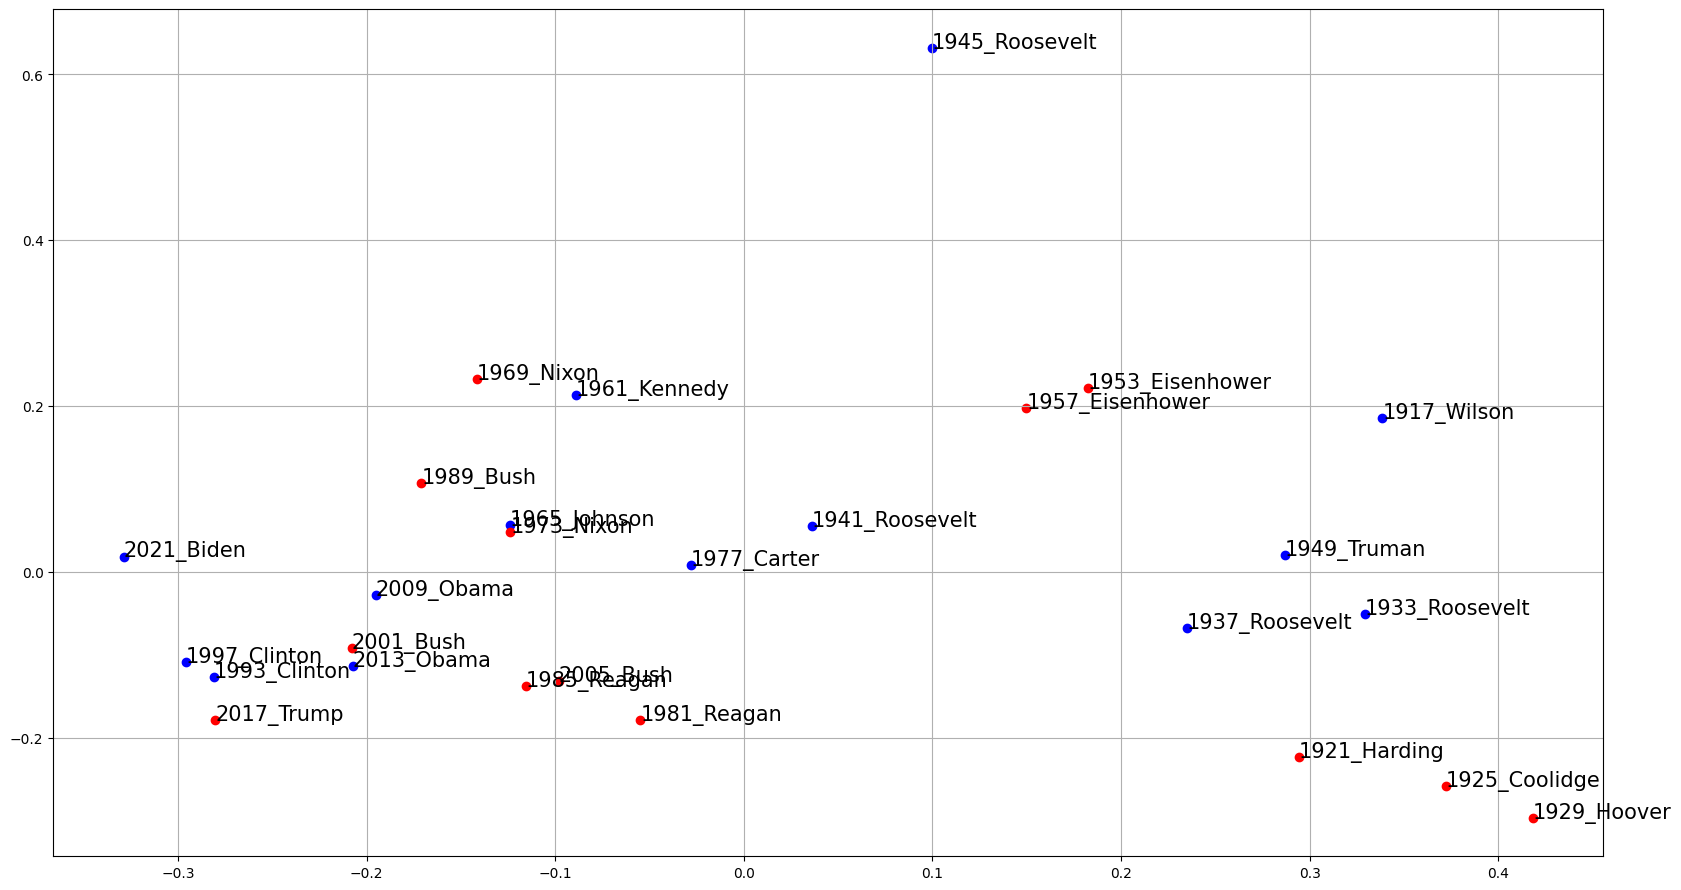

In [70]:
# Plot PCA on the two first dimension
fig, ax = plt.subplots(1, figsize=(20, 11))
for i, name in enumerate(list_files):
    name = name[:-4]
    ax.scatter(tfidf_pca[i, 0], tfidf_pca[i, 1], c = list_color[i])
    ax.annotate(name, (tfidf_pca[i, 0], tfidf_pca[i, 1]), size = 15)
    
ax.grid(True)

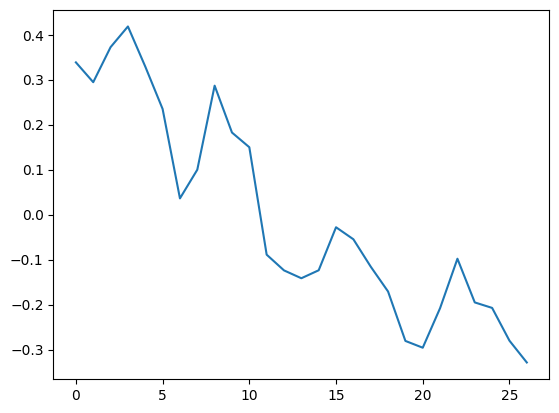

In [71]:
# We can notice the change of the vocabulary through the years !
# It is along the abscisses
plt.plot([tfidf_pca[i, 0] for i in range(len(list_files))])

## 6.B-t-distributed Stochastic Neighbor Embedding (t-SNE) <a name="tsne"></a>

In [72]:
from sklearn.manifold import TSNE

In [74]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=1000)
tfidf_tsne = tsne.fit_transform(np.asarray(tfidf_matrix.todense()))

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 27 samples in 0.001s...
[t-SNE] Computed neighbors for 27 samples in 2.649s...
[t-SNE] Computed conditional probabilities for sample 27 / 27
[t-SNE] Mean sigma: 0.178869
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.225140
[t-SNE] KL divergence after 1000 iterations: 0.326355
t-SNE done! Time elapsed: 2.9649946689605713 seconds


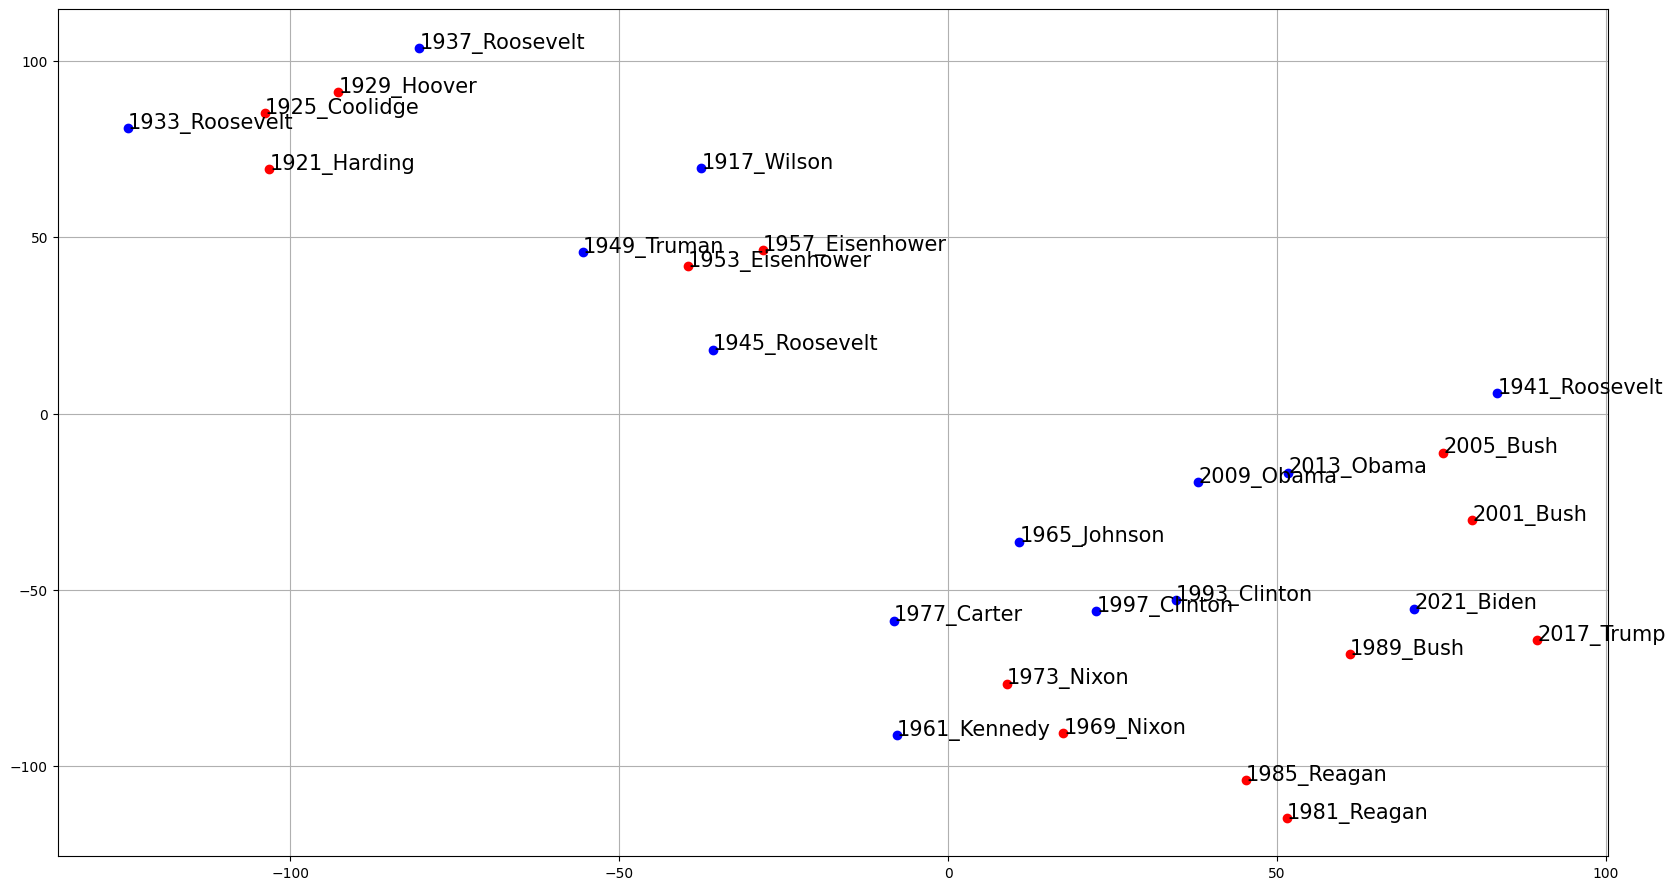

In [75]:
# Plot t-SNE one the two first dimensions (not relevant here)
fig, ax = plt.subplots(1, figsize=(20, 11))
for i, name in enumerate(list_files):
    name = name[:-4]
    ax.scatter(tfidf_tsne[i, 0], tfidf_tsne[i, 1], c = list_color[i])
    ax.annotate(name, (tfidf_tsne[i, 0], tfidf_tsne[i, 1]), size = 15)
    
ax.grid(True)

Here, t-SNE does not give more information ...

# 7-Second method : LSA <a name="lsa"></a>

In [76]:
u,sigma,vt = np.linalg.svd(tfidf_matrix.todense())

<StemContainer object of 3 artists>

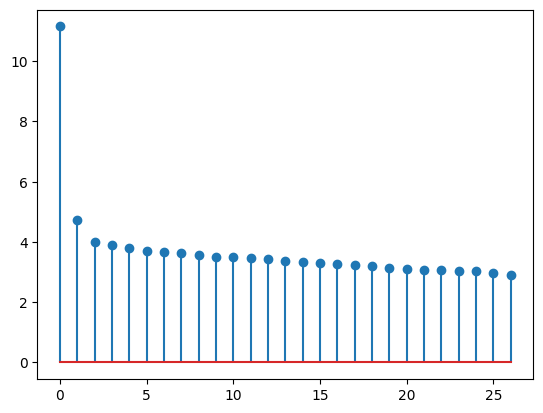

In [77]:
# Display the elements on the diagonal of the matrix sigma
plt.stem(range(len(sigma)), sigma/sum(sigma)*100)

In [78]:
# We only keep the first elements of sigma
nb_rank = 12
# One reconstruct the matrix
reconst_matrix = np.dot(u[:,:nb_rank],np.dot(np.diag(sigma[:nb_rank]),vt[:nb_rank,:]))

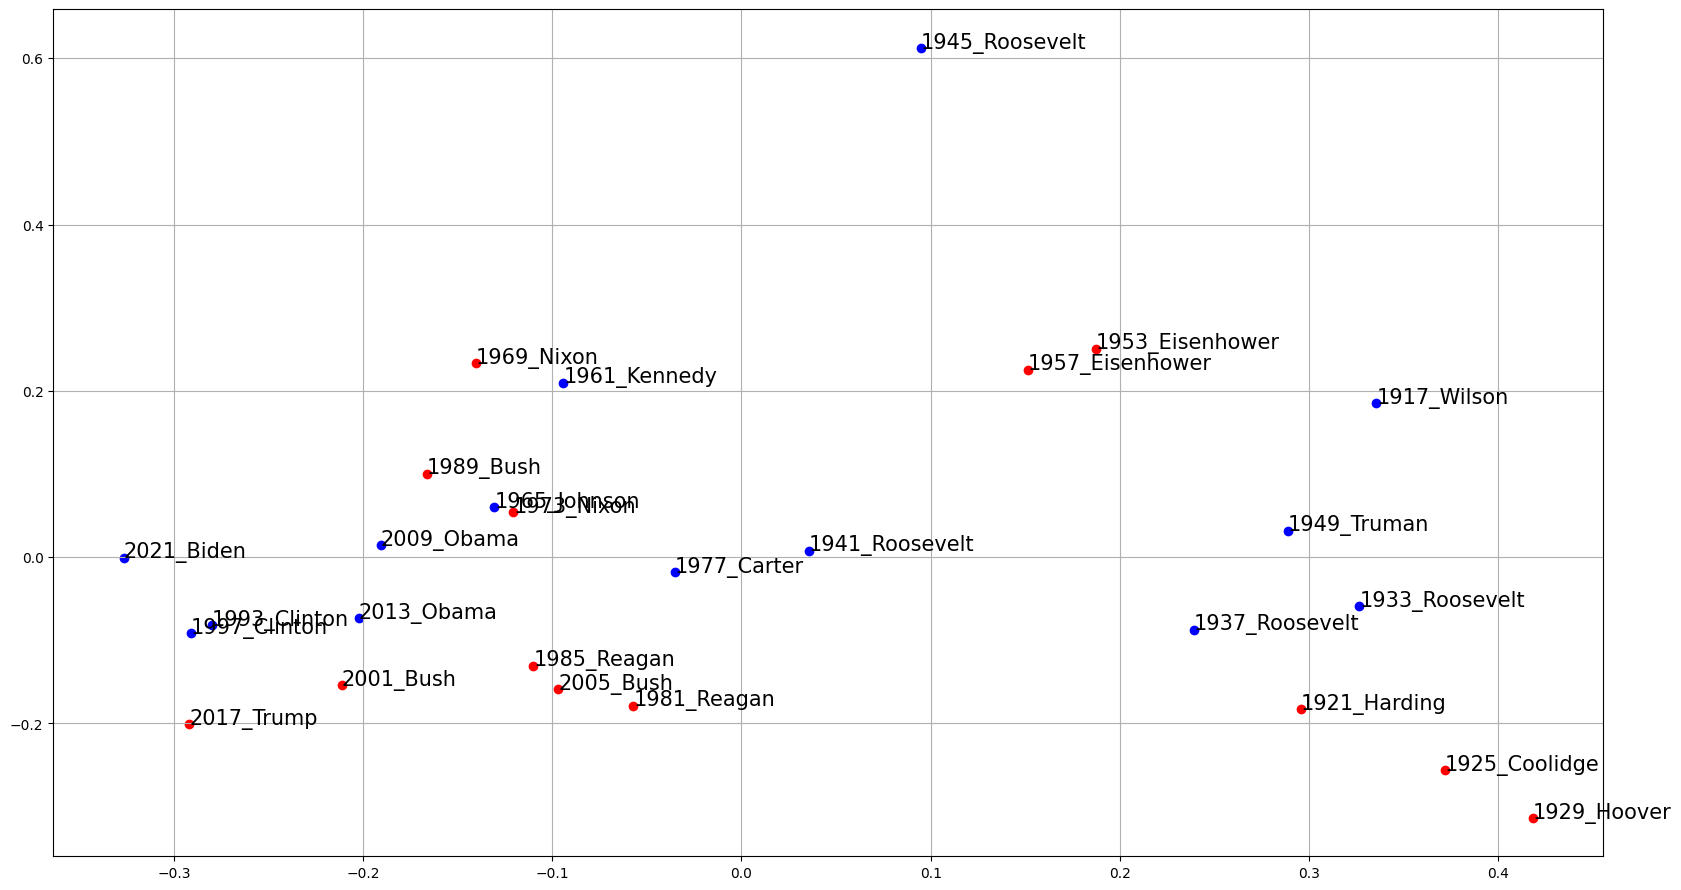

In [81]:
# LSA & PCA
pca.fit(np.asarray(reconst_matrix))
lsa_pca = pca.transform(np.asarray(reconst_matrix))

fig, ax = plt.subplots(1, figsize=(20, 11))
for i, name in enumerate(list_files):
    name = name[:-4]
    ax.scatter(lsa_pca[i, 0], lsa_pca[i, 1], c = list_color[i])
    ax.annotate(name, (lsa_pca[i, 0], lsa_pca[i, 1]), size = 15)
    
ax.grid(True)

The PCA dataviz with LSA is similar to the one obtain with the TF-IDF model.

In [83]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1000)
lsa_tsne = tsne.fit_transform(np.asarray(reconst_matrix))

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 27 samples in 0.001s...
[t-SNE] Computed neighbors for 27 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 27 / 27
[t-SNE] Mean sigma: 0.171963
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.125755
[t-SNE] KL divergence after 1000 iterations: 0.360451
t-SNE done! Time elapsed: 0.277987003326416 seconds


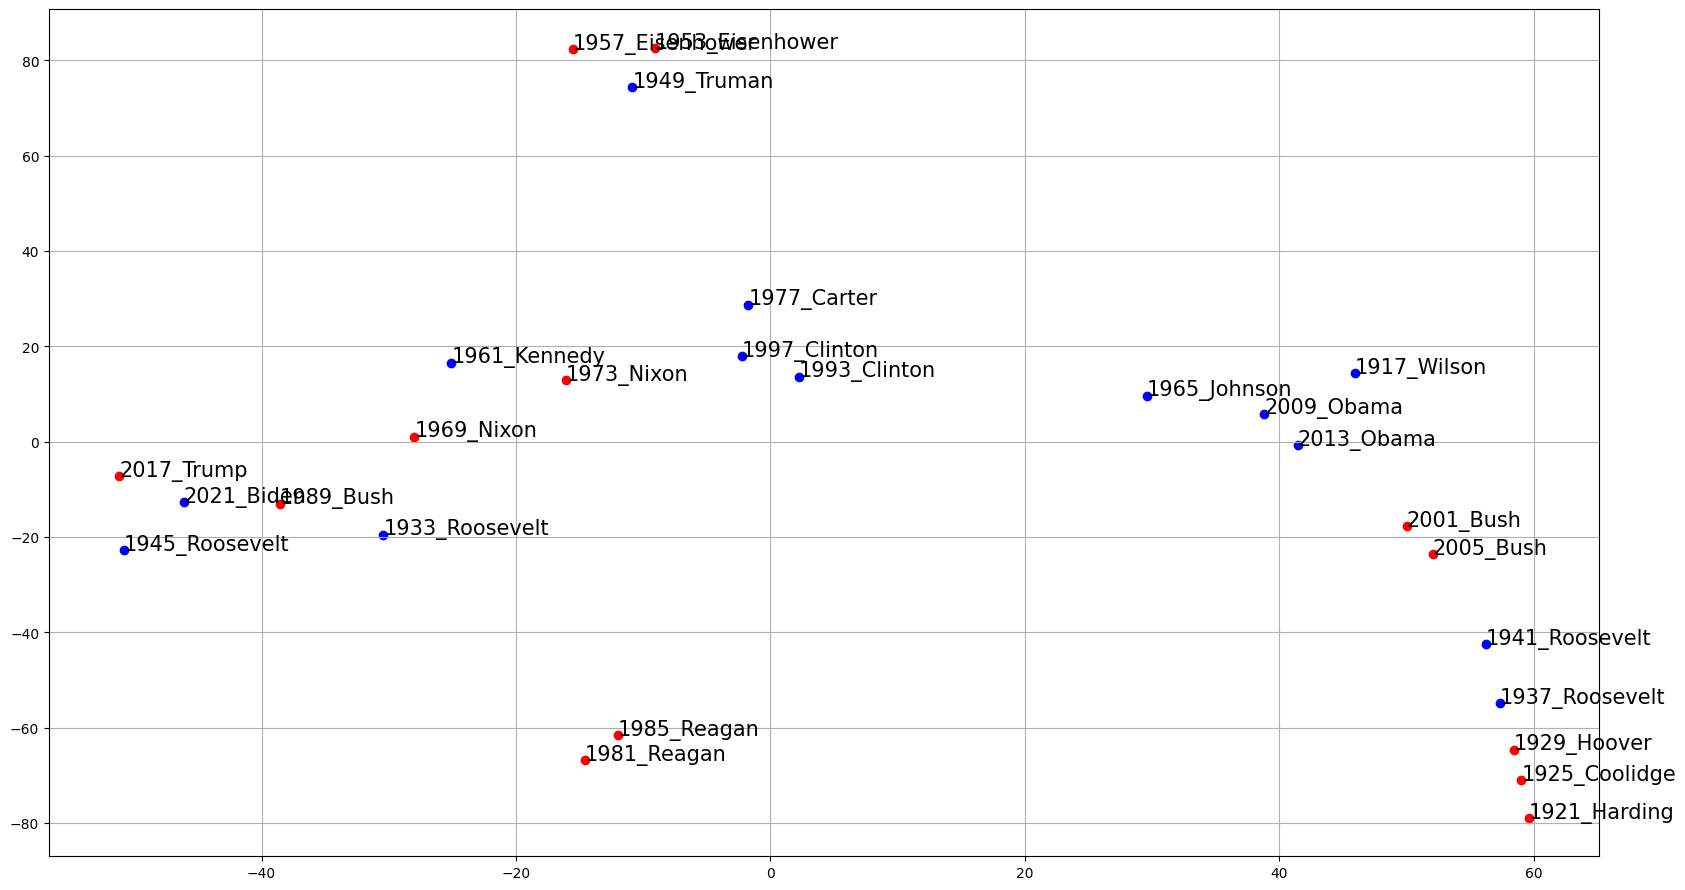

In [84]:
fig, ax = plt.subplots(1, figsize=(20, 11))
for i, name in enumerate(list_files):
    name = name[:-4]
    ax.scatter(lsa_tsne[i, 0], lsa_tsne[i, 1], c = list_color[i])
    ax.annotate(name, (lsa_tsne[i, 0], lsa_tsne[i, 1]), size = 15)
    
ax.grid(True)

t-SNE does not give better results ...

However, t-SNE is <b>REALLY</b> impressive when used with embeddings.